## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
len(study_data_complete["Mouse ID"].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicateMouse = study_data_complete.loc[study_data_complete.duplicated(subset=["Timepoint", "Mouse ID"]), "Mouse ID"]
duplicateMouseDF = pd.DataFrame({"Counts of Mouse ID": duplicateMouse})
duplicateMouseDF.head()




,Counts of Mouse ID
137,g989
360,g989
681,g989
869,g989
1111,g989


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateMouseData = study_data_complete.loc[study_data_complete["Mouse ID"] == "g989"]
duplicateMouseData
# set the index to the mouse ID
duplicateMouseData.style.hide_index()
# check the mouse data for ID

Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26
g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanData = study_data_complete[study_data_complete["Mouse ID"].isin(duplicateMouseData)==False]
cleanData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
study_data_complete2 = len(cleanData["Mouse ID"].unique())
study_data_complete2

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# series variable to hold Tumor Volume Data grouped by Drug Regimen

# variable to hold the Mean Tumor Volume Data Grouped by Drug Regimen


# variable to hold median Tumor Volume Data Grouped by Drug Regimen


# variable to hold the Tumor Volume Variance Data Grouped by Drug Regimen


# variable to hold the Tumor Volume Standard Deviation Data Grouped by Drug Regimen


# variable to hold the Tumor Volume SEM Data Grouped by Drug Regimen


# Convert to DataFrame

# Preview DataFrame

means = cleanData.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = cleanData.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = cleanData.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
StDev = cleanData.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
SEM = cleanData.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summaryTable = pd.DataFrame({
    "Mean Tumor Volume" :means, "Median Tumor Volume" :median, "Tumor Volume Variance" :variance, "Tumor Volume Stdev" :StDev, "Tumor Volume SEM" :SEM 
    
})
summaryTable

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Stdev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summaryTable2 = cleanData.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median","var", "std","sem"]})
summaryTable2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# list of unique drug regimens
uniqueDrugList = pd.DataFrame(study_data_complete["Mouse ID"].value_counts())
uniqueDrugList
# drug regimen as x-axis values for plotting

# drop all duplicate mice


# get mice counts per drug


,Mouse ID
g989,13
r554,10
b879,10
j913,10
p136,10
...,...
u153,1
x226,1
x336,1
t573,1


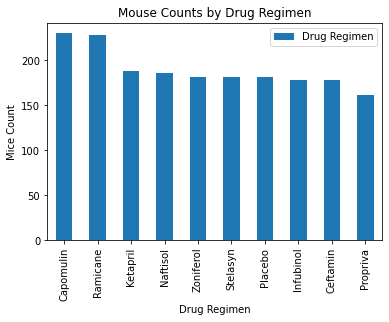

In [11]:
counts = cleanData["Drug Regimen"].value_counts()
counts.plot(kind="bar")
plt.ylabel("Mice Count")
plt.xlabel("Drug Regimen")
plt.title("Mouse Counts by Drug Regimen")
plt.legend(loc='upper right')
plt.show()

In [12]:
# plot the mouse counts for each drug using pandas


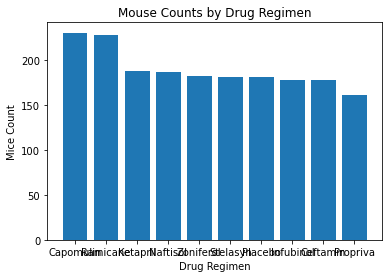

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# plot the bar graph of mice count per drug regimen
plt.bar(counts.index.values, counts.values)

plt.ylabel("Mice Count")
plt.xlabel("Drug Regimen")
plt.title("Mouse Counts by Drug Regimen")

plt.show()

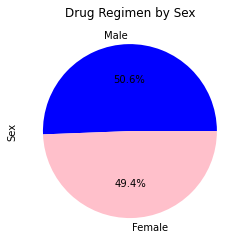

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
counts = cleanData["Sex"].value_counts()
counts.plot(kind="pie", autopct='%1.1f%%',colors = ['blue', 'pink'])
plt.title("Drug Regimen by Sex")
plt.show()

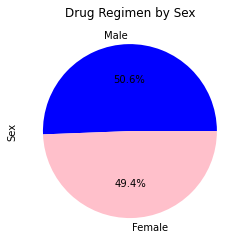

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(counts.values, labels=counts.index.values, autopct='%1.1f%%', colors = ['blue', 'pink'])
plt.title("Drug Regimen by Sex")
plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# set drug regimen as index and drop associated regimens while only keeping Capomulin, Ramicane, Infubinol, and Ceftamin


# isolated view of just capomulin for later use


# Reset index so drug regimen column persists after inner merge


# get mouse count per drug


# Start by getting the last (greatest) timepoint for each mouse
lastTumor = cleanData.groupby("Mouse ID")["Timepoint"].max()
lastTumor = lastTumor.reset_index()
lastTumor.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
cleanMergeDF = lastTumor.merge(cleanData, on=["Mouse ID", "Timepoint"], how="left")
cleanMergeDF.head()




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [17]:
print(cleanMergeDF["Drug Regimen"].unique())

['Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn' 'Zoniferol' 'Ramicane'
 'Ketapril' 'Propriva' 'Naftisol' 'Capomulin']


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
drugList = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumorListCap = []
tumorListRam = []
tumorListInf = []
tumorListCef = []

for i in range(len(cleanMergeDF)-1):
    if cleanMergeDF.loc[i, "Drug Regimen"] == "Capomulin":
        tumorListCap.append(cleanMergeDF.loc[i, "Tumor Volume (mm3)"])
    if cleanMergeDF.loc[i, "Drug Regimen"] == "Ramicane":
        tumorListRam.append(cleanMergeDF.loc[i, "Tumor Volume (mm3)"])
    if cleanMergeDF.loc[i, "Drug Regimen"] == "Infubinol":
        tumorListInf.append(cleanMergeDF.loc[i, "Tumor Volume (mm3)"])
    if cleanMergeDF.loc[i, "Drug Regimen"] == "Ceftamin":
        tumorListCef.append(cleanMergeDF.loc[i, "Tumor Volume (mm3)"])

tumorVolume = [tumorListCap, tumorListRam, tumorListInf, tumorListCef]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
outlierList = []

for i in range(len(tumorVolume)):
    quartiles = pd.Series(tumorVolume[i]).quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    print(f"\n{drugList[i]}:")
    print(f"The lower quartile of tumor volume is: {lowerq}.")
    print(f"The upper quartile of tumor volume is: {upperq}.")
    print(f"The interquartile range of tumor volume is: {iqr}.")
    print(f"The median of tumor volume is: {quartiles[0.5]}.")
    lowerbound = lowerq - (1.5 * iqr)
    upperbound = upperq + (1.5 * iqr)
    print(f"Values below {lowerbound} could be outliers.")
    print(f"Values above {upperbound} could be outliers.")
    
# Locate the rows which contain mice on each drug and get the tumor volumes

# add subset 

# Determine outliers using upper and lower bounds
for d in range(len(tumorVolume[i])):
        if (tumorVolume[i][d] < lowerbound) or (tumorVolume[i][d] > upperbound):
            outlier = tumorVolume[i][d]
            outlierList.append(outlier)
            print(f"The outliers are {outlierList}.")


Capomulin:
The lower quartile of tumor volume is: 32.37735684.
The upper quartile of tumor volume is: 40.1592203.
The interquartile range of tumor volume is: 7.781863460000004.
The median of tumor volume is: 38.1251644.
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Ramicane:
The lower quartile of tumor volume is: 31.56046955.
The upper quartile of tumor volume is: 40.65900627.
The interquartile range of tumor volume is: 9.098536719999998.
The median of tumor volume is: 36.56165229.
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Infubinol:
The lower quartile of tumor volume is: 54.04860769.
The upper quartile of tumor volume is: 65.52574285.
The interquartile range of tumor volume is: 11.477135160000003.
The median of tumor volume is: 60.16518046.
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.

Ceftamin:
The lower quartile of tumor volum

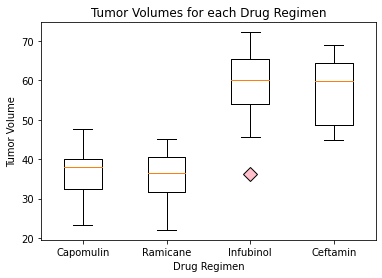

In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
redDot = dict(markerfacecolor='pink', markersize=10, marker="D")
plt.boxplot(tumorVolume, labels = drugList, flierprops=redDot)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volumes for each Drug Regimen")

plt.show()



## Line and Scatter Plots

In [35]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cleanMergeDF.loc[cleanMergeDF["Drug Regimen"] == "Capomulin"].head()
#change index to mouse ID 
cleanMergeDF.set_index("Mouse ID")
#remove other mouse IDs so only s185 shows
s185Tumor = cleanData.loc[cleanData["Mouse ID"]=="s185"]
s185Tumor

#set the x-axis equal to the Timepoint and y-axis to Tumor Volume


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
228,s185,0,45.000000,0,Capomulin,Female,3,17
447,s185,5,43.878496,0,Capomulin,Female,3,17
671,s185,10,37.614948,0,Capomulin,Female,3,17
714,s185,15,38.177232,0,Capomulin,Female,3,17
968,s185,20,36.866876,0,Capomulin,Female,3,17
1196,s185,25,33.949940,0,Capomulin,Female,3,17
1377,s185,30,32.959671,1,Capomulin,Female,3,17
1479,s185,35,28.328531,1,Capomulin,Female,3,17
1652,s185,40,25.472143,1,Capomulin,Female,3,17
1849,s185,45,23.343598,1,Capomulin,Female,3,17


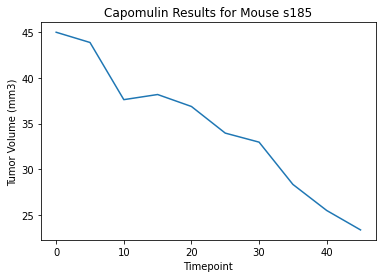

In [43]:
# Generate a scatter plot of average tumor volume vs. time point for the Capomulin regimen
y = (s185Tumor["Tumor Volume (mm3)"])
x = (s185Tumor["Timepoint"])

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Results for Mouse s185")
plt.plot(x,y)
plt.show()


Text(0, 0.5, 'Average Tumor Volume (mm3)')

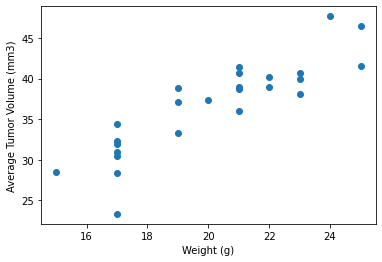

In [54]:
# group by mouse ID to find average tumor volume
# establish x-axis value for the weight of the mice
# produce scatter plot of the data
capomulinDF = cleanMergeDF.loc[cleanMergeDF["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")
avgTumor_capomulin = capomulinDF["Tumor Volume (mm3)"].mean()
mouse_weight = capomulinDF["Weight (g)"].mean()
plt.scatter(mouse_weight, avgTumor_capomulin)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

The mouse's weight and the average tumor volume correlation is 0.88.


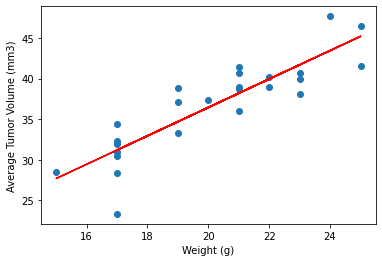

In [59]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#establish x and y values and find St. Pearson Correlation Coefficient for Mouse Weight and Tumor Volume Avg


#print St. Pearson Correlation Coefficient

# establish linear regression values

# linear regression line 


# scatter plot of the data
capomulinDF = cleanMergeDF.loc[cleanMergeDF["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")
avgTumor_capomulin = capomulinDF["Tumor Volume (mm3)"].mean()
mouse_weight = capomulinDF["Weight (g)"].mean()
plt.scatter(mouse_weight, avgTumor_capomulin)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

mouse_weight = mouse_weight.astype(float)
correlation = st.pearsonr(mouse_weight, avgTumor_capomulin)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avgTumor_capomulin)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(mouse_weight,regress_values,"r-")
print(f"The mouse's weight and the average tumor volume correlation is {round(correlation[0], 2)}.")
plt.show()